In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
#path to project
path = r'C:\Users\rtkel\Documents\Data Analytics Course\European Cities Airbnb Project'

In [4]:
#import data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_df.csv'), index_col = False)

#### Step 2 - Clean Data

In [5]:
df.shape

(51707, 21)

In [6]:
df.head()

,Unnamed: 0,City,Time of Week,Room Type,Room Shared,Room Private,Person Capacity,Multiple Rooms,Business Listing,Number of Bedrooms,...,Cleanliness Rating,Overall Guest Satisfaction Rating,Distance from City Centre,Distance from Nearest Metro Station,Attraction Index,Normalized Attraction Index,Restaurant Index,Normalized Restaurant Index,Longitude,Latitude
0,0,Amsterdam,Weekday,Private room,False,True,2.0,1,0,1,...,10.0,93.0,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,Amsterdam,Weekday,Private room,False,True,4.0,0,0,1,...,8.0,85.0,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,Amsterdam,Weekday,Private room,False,True,2.0,0,1,1,...,9.0,87.0,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,Amsterdam,Weekday,Private room,False,True,4.0,0,1,2,...,9.0,90.0,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,Amsterdam,Weekday,Private room,False,True,2.0,0,0,1,...,10.0,98.0,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           51707 non-null  int64  
 1   City                                 51707 non-null  object 
 2   Time of Week                         51707 non-null  object 
 3   Room Type                            51707 non-null  object 
 4   Room Shared                          51707 non-null  bool   
 5   Room Private                         51707 non-null  bool   
 6   Person Capacity                      51707 non-null  float64
 7   Multiple Rooms                       51707 non-null  int64  
 8   Business Listing                     51707 non-null  int64  
 9   Number of Bedrooms                   51707 non-null  int64  
 10  Total Price                          51707 non-null  float64
 11  Cleanliness Rating          

In [8]:
df.describe()

,Unnamed: 0,Person Capacity,Multiple Rooms,Business Listing,Number of Bedrooms,Total Price,Cleanliness Rating,Overall Guest Satisfaction Rating,Distance from City Centre,Distance from Nearest Metro Station,Attraction Index,Normalized Attraction Index,Restaurant Index,Normalized Restaurant Index,Longitude,Latitude
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,25853.000000,3.161661,0.291353,0.350204,1.15876,279.879591,9.390624,92.628232,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,14926.669521,1.298545,0.454390,0.477038,0.62741,327.948386,0.954868,8.945531,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,0.000000,2.000000,0.000000,0.000000,0.00000,34.779339,2.000000,20.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,12926.500000,2.000000,0.000000,0.000000,1.00000,148.752174,9.000000,90.000000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,25853.000000,3.000000,0.000000,0.000000,1.00000,211.343089,10.000000,95.000000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,38779.500000,4.000000,1.000000,1.000000,1.00000,319.694287,10.000000,99.000000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,51706.000000,6.000000,1.000000,1.000000,10.00000,18545.450285,10.000000,100.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [9]:
print(df.columns)

Index(['Unnamed: 0', 'City', 'Time of Week', 'Room Type', 'Room Shared',
       'Room Private', 'Person Capacity', 'Multiple Rooms', 'Business Listing',
       'Number of Bedrooms', 'Total Price', 'Cleanliness Rating',
       'Overall Guest Satisfaction Rating', 'Distance from City Centre',
       'Distance from Nearest Metro Station', 'Attraction Index',
       'Normalized Attraction Index', 'Restaurant Index',
       'Normalized Restaurant Index', 'Longitude', 'Latitude'],
      dtype='object')


In [10]:
#drop unnecessary column including categorical columns
Drop_columns = ['Unnamed: 0','City','Time of Week','Room Type','Room Shared','Room Private','Multiple Rooms','Business Listing','Longitude','Latitude']

df = df.drop(columns=Drop_columns)

In [11]:
df.head()

,Person Capacity,Number of Bedrooms,Total Price,Cleanliness Rating,Overall Guest Satisfaction Rating,Distance from City Centre,Distance from Nearest Metro Station,Attraction Index,Normalized Attraction Index,Restaurant Index,Normalized Restaurant Index
0,2.0,1,194.033698,10.0,93.0,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,4.0,1,344.245776,8.0,85.0,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,2.0,1,264.101422,9.0,87.0,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,4.0,2,433.529398,9.0,90.0,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,2.0,1,485.552926,10.0,98.0,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


#### Step 3 - Elbow Technique

In [12]:
#define range of clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
#Initialize K-Means model
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [14]:
#compute scores
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

C:\Users\rtkel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rtkel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rtkel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rtkel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

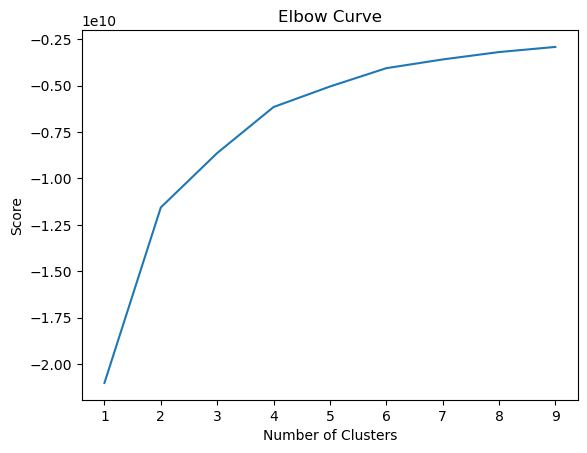

In [15]:
# Plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Step 4 - Choose Number of Clusters
The curve begins to straightens out after four. This means the optimal number of cluster is three.

In [16]:
#create k-means object
kmeans = KMeans(n_init=10,n_clusters = 4)

#### Step 5 - Run k-means algorithm

In [17]:
#Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=4, n_init=10)

#### Step 6 - Add new column

In [18]:
#add clusters to dataframe
df['clusters'] = kmeans.fit_predict(df) 

In [19]:
df.head()

,Person Capacity,Number of Bedrooms,Total Price,Cleanliness Rating,Overall Guest Satisfaction Rating,Distance from City Centre,Distance from Nearest Metro Station,Attraction Index,Normalized Attraction Index,Restaurant Index,Normalized Restaurant Index,clusters
0,2.0,1,194.033698,10.0,93.0,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,1
1,4.0,1,344.245776,8.0,85.0,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,0
2,2.0,1,264.101422,9.0,87.0,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,1
3,4.0,2,433.529398,9.0,90.0,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,0
4,2.0,1,485.552926,10.0,98.0,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,0


In [20]:
df['clusters'].value_counts()

clusters
1    27516
0    19378
2     4788
3       25
Name: count, dtype: int64

#### Step 7 - Create Visualizations

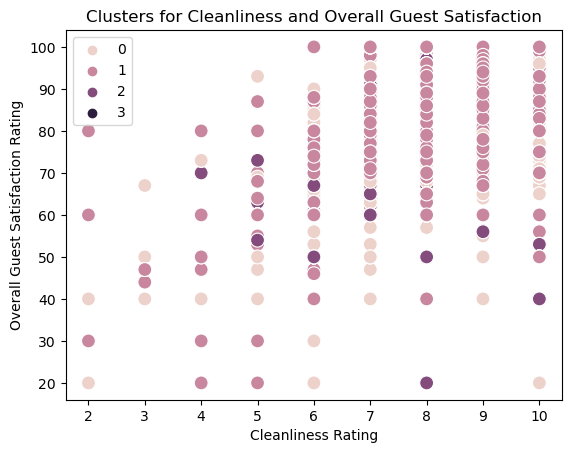

In [21]:
# Plot the clusters for the "Cleanliness Rating" and "Overall Guest Satisfaction Rating" variables.

Cleanliness_satisfaction_scatterplot = sns.scatterplot(x=df['Cleanliness Rating'], y=df['Overall Guest Satisfaction Rating'], hue=kmeans.labels_, s=100) 

Cleanliness_satisfaction_scatterplot.grid(False)
plt.xlabel('Cleanliness Rating') 
plt.ylabel('Overall Guest Satisfaction Rating') 
plt.title('Clusters for Cleanliness and Overall Guest Satisfaction')
plt.show()

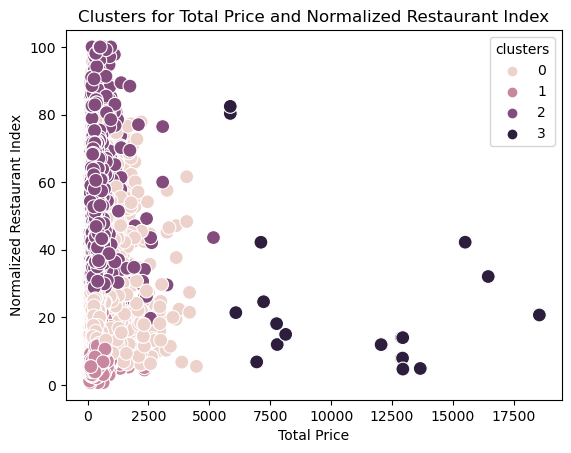

In [22]:
# Plot the clusters for the "Total Price" and "Normalized Restaurant Indez" variables.
price_attraction_scatterplot = sns.scatterplot(x=df['Total Price'], y=df['Normalized Restaurant Index'], hue=df['clusters'], s=100)

price_attraction_scatterplot.grid(False)
plt.xlabel('Total Price')
plt.ylabel('Normalized Restaurant Index')
plt.title('Clusters for Total Price and Normalized Restaurant Index')
plt.show()

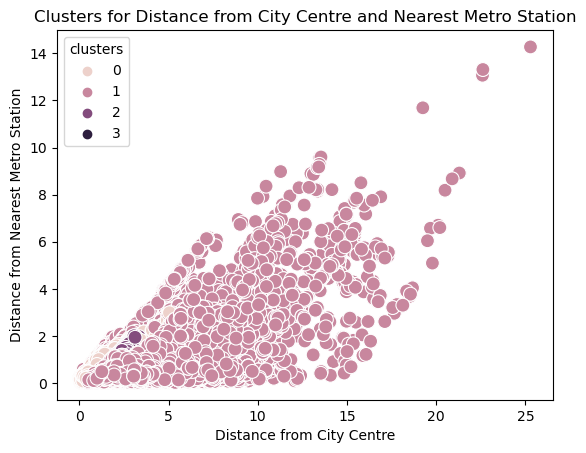

In [23]:
# Plot the clusters for the "Distance from City Centre" and "Nearest Metro Station" variables.
distance_scatterplot = sns.scatterplot(x=df['Distance from City Centre'], y=df['Distance from Nearest Metro Station'], hue=df['clusters'], s=100)

distance_scatterplot.grid(False)
plt.xlabel('Distance from City Centre')
plt.ylabel('Distance from Nearest Metro Station')
plt.title('Clusters for Distance from City Centre and Nearest Metro Station')
plt.show()

#### Step 8 - Discuss Results

The scatterplots unveil distinct clusters in the Cleanliness Rating vs. Overall Guest Satisfaction Rating, illustrating varied satisfaction levels. Geographical patterns emerge in the Distance from City Centre vs. Distance from Nearest Metro Station plot, indicating diverse accessibility. The Total Price vs. Attraction Index plot emphasizes clusters reflecting pricing and proximity to attractions. 

#### Step 9 - Calculate Descriptive Stats

In [24]:
cluster_stats = df.groupby('clusters').agg({
    'Person Capacity': ['mean', 'median'],
    'Number of Bedrooms': ['mean', 'median'],
    'Total Price': ['mean', 'median'],
    'Cleanliness Rating': ['mean', 'median'],
    'Overall Guest Satisfaction Rating': ['mean', 'median'],
    'Distance from City Centre': ['mean', 'median'],
    'Distance from Nearest Metro Station': ['mean', 'median'],
    'Attraction Index': ['mean', 'median'],
    'Normalized Attraction Index': ['mean', 'median'],
    'Restaurant Index': ['mean', 'median'],
    'Normalized Restaurant Index': ['mean', 'median']
})

In [25]:
cluster_stats

Person Capacity        Number of Bedrooms          Total Price  \
                    mean median               mean median          mean   
clusters                                                                  
0               3.165807    3.0           1.138611    1.0    340.888274   
1               3.119603    3.0           1.166412    1.0    216.579741   
2               3.384712    3.0           1.191938    1.0    344.346024   
3               3.520000    2.0           2.000000    2.0  10314.565166   

                      Cleanliness Rating         \
               median               mean median   
clusters                                          
0          256.176519           9.332181   10.0   
1          175.925063           9.432185   10.0   
2          266.990859           9.389515   10.0   
3         8130.668104           9.160000    9.0   

         Overall Guest Satisfaction Rating         ...  \
                                      mean median  ...   
clusters                                           ...   
0                                91.798173   94.0  ...   
1                                93.292593   96.0  ...   
2                                92.165622   94.0  ...   
3                                93.400000   95.0  ...   

         Distance from Nearest Metro Station           Attraction Index  \
                                        mean    median             mean   
clusters                                                                  
0                                   0.443377  0.334665       379.475938   
1                                   0.855225  0.484072       151.855605   
2                                   0.647925  0.394870       766.682637   
3                                   0.560080  0.418405       383.664581   

                     Normalized Attraction Index            Restaurant Index  \
              median                        mean     median             mean   
clusters                                                                       
0         356.506461                   17.340044  15.968903       827.166221   
1         143.016961                    8.803699   7.687856       284.957959   
2         715.736212                   24.054261  18.752262      1780.802721   
3         260.896109                   26.970882  16.250018       666.621072   

                      Normalized Restaurant Index             
               median                        mean     median  
clusters                                                      
0          790.360073                   30.560787  25.573211  
1          267.852963                   13.578849   9.315615  
2         1653.383870                   44.244706  39.626099  
3          444.050900                   20.747328  13.988024  

[4 rows x 22 columns]

#### In the cluster analysis, four distinct groups emerged, each revealing specific trends in accommodation characteristics. Cluster 0 showcases larger and potentially more luxurious properties with a focus on cleanliness and high guest satisfaction. Cluster 1 represents affordable options with consistent accommodation sizes, maintaining a commitment to quality service. Cluster 2 mirrors the affordability and quality focus seen in Cluster 1 but features properties with longer distances from the city center. Cluster 3, similar in pricing to the previous clusters, stands out for a slightly longer distance from both the city center and metro station. 

#### Step 10 - Future Steps

#### The cluster analysis results offer actionable insights for refining marketing, operations, and pricing strategies. With a focus on enhancing customer experiences and guiding geographic expansion, these findings provide a targeted approach to decision-making in subsequent analytics pipeline stages. By leveraging these cluster characteristics, property managers can make informed and efficient decisions to drive business success.